# EGCI 305: Chapter 11 (Distribution Free)

Outline
> 1. [Packages](#ch11_packages)

> 2. [Wilcoxon signed rank (paired groups)](#ch11_wilcoxon_sr)
>    - [Example: diet strategies (paired t-test)](#ch11_ex_diet)
>    - [Example: iron temperature (1 sample)](#ch11_ex_iron)

> 3. [Wilcoxon rank sum vs. Mann-Whitney U (independent groups)](#ch11_mannwhitney)
>    - [Example: fluoride concentration](#ch11_ex_fluoride)

Functions
> - [printSignedRank](#ch11_func_print_sr)
> - [printRankSums](#ch11_func_print_rsums)

<a name="ch11_packages"></a>

## Packages
> - **numpy** -- to work with array manipulation
> - **matplotlib** -- to work with visualization (backend)
> - **seaborn** -- to work with high-level visualization
> - **math** -- to work with calculation such as sqrt (if not using sympy)
> - **scipy.stats** -- to work with stat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Numpy version =", np.version.version)
print("Seaborn version =", sns.__version__)

import math
import scipy
print("Scipy version =", scipy.__version__)

from scipy import stats
from scipy.stats import wilcoxon        # Wilcoxon signed rank
from scipy.stats import ranksums        # Wilcoxon rank sum
from scipy.stats import mannwhitneyu    # Mann-Whitney U

from scipy.stats import ttest_1samp     # T-test

Numpy version = 1.24.3
Seaborn version = 0.12.2
Scipy version = 1.11.1


<a name="ch11_wilcoxon_sr"></a>

## Wilcoxon Signed Rank (paired groups)
- **[Manual: scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)**
- Can use this function to do the whole testing procedure **if raw data are available**
- Testing $\mu$<sub>D</sub> (D = A - B) against 0 only

<a name="ch11_func_print_sr"></a>
#### Function : printSignedRank

In [2]:
import pandas as pd

### Just for quick overview. No tie handling

def printSignedRank(D):
    srank     = [None] * D.size
    sortindex = np.argsort( abs(D) )
    order = 1
    for i in sortindex:
        srank[i] = order
        order = order + 1
        if D[i] < 0:
            srank[i] = srank[i] * (-1)

    df = pd.DataFrame( {'D': D,                   
                        'signed rank': srank
                       }
                     )
    print(df.to_markdown(), "\n")
    #print(df.T.to_markdown(), "\n")

<a name="ch11_ex_diet"></a>

### Example : diet strategies (paired t-test)
- Hypothesis
    >- H<sub>0</sub> : $\mu$<sub>D</sub> = 0
    >- H<sub>1</sub> : $\mu$<sub>D</sub> $\ne$ 0
    >- D = IF - Std

In [3]:
IF  = np.array( [1753.7, 1604.4, 1576.5, 1279.7, 1754.2, 1695.5, 1700.1, 1717.0] )
Std = np.array( [1755.0, 1691.1, 1697.1, 1477.7, 1785.2, 1669.7, 1901.3, 1735.3] )
D   = IF - Std
printSignedRank(D)

result = wilcoxon(IF, Std, alternative = 'two-sided')
print("Calculated S+ = %.1f" % result.statistic)
print("P-value       = %.3f" % result.pvalue)

|    |      D |   signed rank |
|---:|-------:|--------------:|
|  0 |   -1.3 |            -1 |
|  1 |  -86.7 |            -5 |
|  2 | -120.6 |            -6 |
|  3 | -198   |            -7 |
|  4 |  -31   |            -4 |
|  5 |   25.8 |             3 |
|  6 | -201.2 |            -8 |
|  7 |  -18.3 |            -2 | 

Calculated S+ = 3.0
P-value       = 0.039


In [25]:
### Suppose that subject 7 has extreme IF and Std values

IF  = np.array( [1753.7, 1604.4, 1576.5, 1279.7, 1754.2, 1695.5, 5000, 1717.0] ) #SMALL VALUE 16381.0
Std = np.array( [1755.0, 1691.1, 1697.1, 1477.7, 1785.2, 1669.7, 6000, 1735.3] ) # BIGGER VALUE 17811.1
D = IF - Std # SMALLER - BIGGER
printSignedRank(D)

# Sum the values in each array
sum_IF = np.sum(IF)
sum_Std = np.sum(Std)

# Output the results
print("Sum of array IF:", sum_IF)
print("Sum of array Std:", sum_Std)

result = wilcoxon(IF, Std, alternative = 'two-sided')
print("Calculated S+ = %.1f" % result.statistic)
print("P-value       = %.3f" % result.pvalue)

|    |       D |   signed rank |
|---:|--------:|--------------:|
|  0 |    -1.3 |            -1 |
|  1 |   -86.7 |            -5 |
|  2 |  -120.6 |            -6 |
|  3 |  -198   |            -7 |
|  4 |   -31   |            -4 |
|  5 |    25.8 |             3 |
|  6 | -1000   |            -8 |
|  7 |   -18.3 |            -2 |
Sum of array IF: 16381.0
Sum of array Std: 17811.1
Calculated S+ = 3.0
P-value       = 0.039


<a name="ch11_ex_iron"></a>

### Example : iron temperature (1 sample)
- Hypothesis
    >- H<sub>0</sub> : $\mu$ = 500
    >- H<sub>1</sub> : $\mu$ $\ne$ 500
- Create a dummy array of equal size, with all members = value to be tested
- Apply W-SR test between $\mu$ and dummy

In [5]:
A = np.array( [494.6, 510.8, 487.5, 493.2, 502.6, 485.0, 495.9, 498.2,
               501.6, 497.3, 492.0, 504.3, 499.2, 493.5, 505.8] )

mutest = 500
dummy  = np.full(A.size, mutest)
print(dummy, "\n")
printSignedRank(A-dummy)

result = wilcoxon(A, dummy, alternative = 'two-sided')
print("Calculated S+ = %.1f" % result.statistic)
print("P-value       = %.3f" % result.pvalue)

[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500] 

|    |     D |   signed rank |
|---:|------:|--------------:|
|  0 |  -5.4 |            -8 |
|  1 |  10.8 |            13 |
|  2 | -12.5 |           -14 |
|  3 |  -6.8 |           -11 |
|  4 |   2.6 |             4 |
|  5 | -15   |           -15 |
|  6 |  -4.1 |            -6 |
|  7 |  -1.8 |            -3 |
|  8 |   1.6 |             2 |
|  9 |  -2.7 |            -5 |
| 10 |  -8   |           -12 |
| 11 |   4.3 |             7 |
| 12 |  -0.8 |            -1 |
| 13 |  -6.5 |           -10 |
| 14 |   5.8 |             9 | 

Calculated S+ = 35.0
P-value       = 0.169


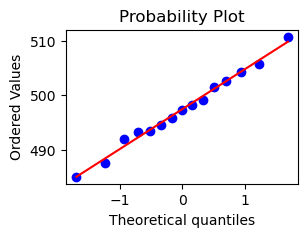

Sample size = 15, mean = 497.43, sd = 6.9187 

Calculated T = -1.44
df           = 14
P-value      = 0.1727


In [6]:
### Compare with parametric t-test

fig = plt.figure( figsize = (3,2) )
stats.probplot(A, dist = 'norm', plot = plt)
plt.show()

n  = A.size
mu = A.mean()
s  = A.std(ddof=1)
print("Sample size = %d, mean = %.2f, sd = %.4f \n" % (n, mu, s))

result = ttest_1samp(A, 500, alternative = 'two-sided')
print("Calculated T = %.2f" % result.statistic)
print("df           = %d"   % result.df)
print("P-value      = %.4f" % result.pvalue)

In [7]:
### Suppose that a member has extreme value

A = np.array( [494.6, 510.8, 487.5, 493.2, 502.6,   4.0, 495.9, 498.2,
               501.6, 497.3, 492.0, 504.3, 499.2, 493.5, 505.8] )

mutest = 500
dummy  = np.full(A.size, mutest)
print(dummy, "\n")
printSignedRank(A-dummy)

result = wilcoxon(A, dummy, alternative = 'two-sided')
print("Calculated S+ = %.1f" % result.statistic)
print("P-value       = %.3f" % result.pvalue, "\n")


### Check whether we can use parametric t-test
fig = plt.figure( figsize = (3,2) )
stats.probplot(A, dist = 'norm', plot = plt)
plt.show()

n  = A.size
mu = A.mean()
s  = A.std(ddof=1)
print("Sample size = %d, mean = %.2f, sd = %.4f \n" % (n, mu, s))

[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500] 

|    |      D |   signed rank |
|---:|-------:|--------------:|
|  0 |   -5.4 |            -8 |
|  1 |   10.8 |            13 |
|  2 |  -12.5 |           -14 |
|  3 |   -6.8 |           -11 |
|  4 |    2.6 |             4 |
|  5 | -496   |           -15 |
|  6 |   -4.1 |            -6 |
|  7 |   -1.8 |            -3 |
|  8 |    1.6 |             2 |
|  9 |   -2.7 |            -5 |
| 10 |   -8   |           -12 |
| 11 |    4.3 |             7 |
| 12 |   -0.8 |            -1 |
| 13 |   -6.5 |           -10 |
| 14 |    5.8 |             9 | 

Calculated S+ = 35.0
P-value       = 0.169 



Sample size = 15, mean = 465.37, sd = 127.7743 



<a name="ch11_mannwhitney"></a>

## Wilcoxon Rank Sum vs. Mann-Whitney U (independent groups)
- **[Manual: scipy.stats.ranksums](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)**
- **[Manual: scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)**
- Can use this function to do the whole testing procedure **if raw data are available**
- Testing $\mu$<sub>A</sub> - $\mu$<sub>B</sub> against 0 only

<a name="ch11_ex_fluoride"></a>

### Example : fluoride concentration
- Hypothesis
    >- H<sub>0</sub> : $\mu$<sub>X</sub> - $\mu$<sub>Y</sub> = 0
    >- H<sub>1</sub> : $\mu$<sub>X</sub> - $\mu$<sub>Y</sub> < 0

<a name="ch11_func_print_rsums"></a>
#### Function : printRankSums

In [8]:
import pandas as pd

### Just for quick overview. No tie handling

def printRankSums(X, Y):
    rank = list( range(1, X.size + Y.size + 1) )
    dfX = pd.DataFrame( {'group': ['X'] * X.size,                   
                         'value': X,
                        }
                      )
    dfY = pd.DataFrame( {'group': ['Y'] * Y.size,                   
                         'value': Y,
                        }
                      ) 
    df = pd.concat([dfX, dfY]).sort_values(by = 'value')
    df['rank'] = rank

    rankSumX = 0
    rankSumY = 0
    for index, row in df.iterrows():
        if row['group'] == 'X':
            rankSumX = rankSumX + row['rank']
        elif row['group'] == 'Y':
            rankSumY = rankSumY + row['rank']
    
    #print(df.to_markdown(index = False), "\n")
    print(df.set_index('group').T.to_markdown(), "\n")
    print("Rank sum X = %d, size = %d" % (rankSumX, X.size))
    print("Rank sum Y = %d, size = %d" % (rankSumY, Y.size), "\n")

In [9]:
polluted   = np.array( [21.3, 18.7, 23.0, 17.1, 16.8, 20.9, 19.7] )
unpolluted = np.array( [14.2, 18.3, 17.2, 18.4, 20.0] )

X = unpolluted          # small group
Y = polluted            # big group
printRankSums(X, Y)

result = ranksums(X, Y, alternative = 'less')
print("=== Wilcoxon rank sum ===")
print("Approximated Z = %.2f" % result.statistic)
print("P-value        = %.3f" % result.pvalue, "\n")

result = mannwhitneyu(X, Y, alternative = 'less')
print("=== Mann-Whitney U ===")
print("UX      = %.2f" % result.statistic)
print("P-value = %.3f" % result.pvalue, "\n")

|       |    X |    Y |    Y |    X |    X |    X |    Y |    Y |   X |    Y |    Y |   Y |
|:------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|----:|-----:|-----:|----:|
| value | 14.2 | 16.8 | 17.1 | 17.2 | 18.3 | 18.4 | 18.7 | 19.7 |  20 | 20.9 | 21.3 |  23 |
| rank  |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |   9 | 10   | 11   |  12 | 

Rank sum X = 25, size = 5
Rank sum Y = 53, size = 7 

=== Wilcoxon rank sum ===
Approximated Z = -1.22
P-value        = 0.112 

=== Mann-Whitney U ===
UX      = 10.00
P-value = 0.134 



In [10]:
### Suppose that members in each group has extreme values

polluted   = np.array( [21.3, 18.7,  230, 17.1, 16.8, 20.9, 19.7] )
unpolluted = np.array( [1.42, 18.3, 17.2, 18.4, 20.0] )

X = unpolluted          # small group
Y = polluted            # big group
printRankSums(X, Y)

result = ranksums(X, Y, alternative = 'less')
print("=== Wilcoxon rank sum ===")
print("Approximated Z = %.2f" % result.statistic)
print("P-value        = %.3f" % result.pvalue, "\n")

result = mannwhitneyu(X, Y, alternative = 'less')
print("=== Mann-Whitney U ===")
print("UX      = %.2f" % result.statistic)
print("P-value = %.3f" % result.pvalue, "\n")

|       |    X |    Y |    Y |    X |    X |    X |    Y |    Y |   X |    Y |    Y |   Y |
|:------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|----:|-----:|-----:|----:|
| value | 1.42 | 16.8 | 17.1 | 17.2 | 18.3 | 18.4 | 18.7 | 19.7 |  20 | 20.9 | 21.3 | 230 |
| rank  | 1    |  2   |  3   |  4   |  5   |  6   |  7   |  8   |   9 | 10   | 11   |  12 | 

Rank sum X = 25, size = 5
Rank sum Y = 53, size = 7 

=== Wilcoxon rank sum ===
Approximated Z = -1.22
P-value        = 0.112 

=== Mann-Whitney U ===
UX      = 10.00
P-value = 0.134 



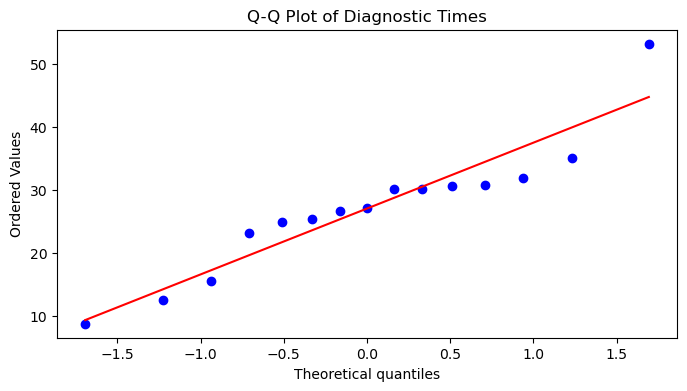

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data
times = np.array([30.6, 30.1, 15.6, 26.7, 27.1, 25.4, 35.0, 30.8, 31.9, 53.2, 12.5, 23.2, 8.8, 24.9, 30.2])

# Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(times, vert=False)
plt.xlabel('Time in minutes')
plt.title('Boxplot of Diagnostic Times')
plt.grid(True)
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 4))
stats.probplot(times, dist="norm", plot=plt)
plt.title('Q-Q Plot of Diagnostic Times')
plt.show()


In [18]:
import numpy as np
import scipy.stats as stats

import numpy as np
import pandas as pd

def printRankSumsNew(data, num):
    # Step 1: Subtract the median from each data point
    differences = data - num
    
    # Step 2: Sort the differences by their absolute values
    df = pd.DataFrame({
        'Original Data': data,
        'Differences': differences
    })
    df['Abs Differences'] = df['Differences'].abs()
    df_sorted = df.sort_values(by='Abs Differences')
    
    # Assign ranks based on sorted absolute differences
    df_sorted['Rank'] = range(1, len(df_sorted) + 1)
    
    # Display the steps
    print("3.1 Data Input:\n", data)
    print("\n3.2 Data after deducting 30:\n", differences)
    print("\n3.3 Ranked Data:")
    print(df_sorted[['Original Data', 'Differences', 'Rank']])

times = np.array([30.6, 30.1, 15.6, 26.7, 27.1, 25.4, 35.0, 30.8, 31.9, 53.2, 12.5, 23.2, 8.8, 24.9, 30.2])

printRankSumsNew(times, 30)

wilcoxon_results = stats.wilcoxon(times - 30, alternative='less')

# Printing the results
print(f"Wilcoxon Test Statistic (S+): {wilcoxon_results.statistic}")
print(f"P-value: {wilcoxon_results.pvalue}")


3.1 Data Input:
 [30.6 30.1 15.6 26.7 27.1 25.4 35.  30.8 31.9 53.2 12.5 23.2  8.8 24.9
 30.2]

3.2 Data after deducting 30:
 [  0.6   0.1 -14.4  -3.3  -2.9  -4.6   5.    0.8   1.9  23.2 -17.5  -6.8
 -21.2  -5.1   0.2]

3.3 Ranked Data:
    Original Data  Differences  Rank
1            30.1          0.1     1
14           30.2          0.2     2
0            30.6          0.6     3
7            30.8          0.8     4
8            31.9          1.9     5
4            27.1         -2.9     6
3            26.7         -3.3     7
5            25.4         -4.6     8
6            35.0          5.0     9
13           24.9         -5.1    10
11           23.2         -6.8    11
2            15.6        -14.4    12
10           12.5        -17.5    13
12            8.8        -21.2    14
9            53.2         23.2    15
Wilcoxon Test Statistic (S+): 39.0
P-value: 0.126190185546875


In [26]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

# Function to print signed ranks
def printSignedRank(D):
    srank = [None] * D.size
    sortindex = np.argsort(np.abs(D))
    order = 1
    for i in sortindex:
        srank[i] = order
        if D[i] < 0:
            srank[i] = -order
        order += 1

    df = pd.DataFrame({
        'D': D,
        'signed rank': srank
    })
    print(df.to_markdown())  # Assuming Jupyter Notebook or compatible environment

# Example data
G = np.array([54.7, 58.5, 66.8, 46.1, 52.3, 74.3, 92.5, 40.2, 87.3, 74.8, 63.2, 68.5]) #BIGGER VALUE 779.1999999999999
S = np.array([55.0, 55.7, 62.9, 45.5, 51.1, 75.4, 89.6, 38.4, 86.8, 72.5, 62.3, 66.0]) # SMALLER VALUE 761.1999999999999
D = S - G # SMALLER - BIGGER

# Sum the values in each array
sum_G = np.sum(G)
sum_S = np.sum(S)

# Output the results
print("Sum of array G:", sum_G)
print("Sum of array S:", sum_S)

# Calculate and print signed ranks
printSignedRank(D)

# Perform Wilcoxon signed-rank test
result = wilcoxon(G, S, alternative='two-sided')
print("Calculated S+ = %.1f" % result.statistic)
print("P-value       = %.3f" % result.pvalue)


Sum of array G: 779.1999999999999
Sum of array S: 761.1999999999999
|    |    D |   signed rank |
|---:|-----:|--------------:|
|  0 |  0.3 |             1 |
|  1 | -2.8 |           -10 |
|  2 | -3.9 |           -12 |
|  3 | -0.6 |            -3 |
|  4 | -1.2 |            -6 |
|  5 |  1.1 |             5 |
|  6 | -2.9 |           -11 |
|  7 | -1.8 |            -7 |
|  8 | -0.5 |            -2 |
|  9 | -2.3 |            -8 |
| 10 | -0.9 |            -4 |
| 11 | -2.5 |            -9 |
Calculated S+ = 6.0
P-value       = 0.007


In [27]:
### Suppose that members in each group has extreme values
def printRankSums(X, Y):
    rank = list( range(1, X.size + Y.size + 1) )
    dfX = pd.DataFrame( {'group': ['X'] * X.size,                   
                         'value': X,
                        }
                      )
    dfY = pd.DataFrame( {'group': ['Y'] * Y.size,                   
                         'value': Y,
                        }
                      ) 
    df = pd.concat([dfX, dfY]).sort_values(by = 'value')
    df['rank'] = rank

    rankSumX = 0
    rankSumY = 0
    for index, row in df.iterrows():
        if row['group'] == 'X':
            rankSumX = rankSumX + row['rank']
        elif row['group'] == 'Y':
            rankSumY = rankSumY + row['rank']
    
    #print(df.to_markdown(index = False), "\n")
    print(df.set_index('group').T.to_markdown(), "\n")
    print("Rank sum X = %d, size = %d" % (rankSumX, X.size))
    print("Rank sum Y = %d, size = %d" % (rankSumY, Y.size), "\n")

oak = np.array([1.72, .67, 1.55, 1.56, 1.42, 1.23, 1.77, .48])
pine = np.array([.98, 1.40, 1.33, 1.52, .73, 1.20])

X = pine  # smaller group
Y = oak   # bigger group
printRankSums(X, Y)

result = ranksums(X, Y, alternative = 'less')
print("=== Wilcoxon rank sum ===")
print("Approximated Z = %.2f" % result.statistic)
print("P-value        = %.3f" % result.pvalue, "\n")

result = mannwhitneyu(X, Y, alternative = 'less')
print("=== Mann-Whitney U ===")
print("UX      = %.2f" % result.statistic)
print("P-value = %.3f" % result.pvalue, "\n")

|       |    Y |    Y |    X |    X |   X |    Y |    X |   X |    Y |     X |     Y |     Y |     Y |     Y |
|:------|-----:|-----:|-----:|-----:|----:|-----:|-----:|----:|-----:|------:|------:|------:|------:|------:|
| value | 0.48 | 0.67 | 0.73 | 0.98 | 1.2 | 1.23 | 1.33 | 1.4 | 1.42 |  1.52 |  1.55 |  1.56 |  1.72 |  1.77 |
| rank  | 1    | 2    | 3    | 4    | 5   | 6    | 7    | 8   | 9    | 10    | 11    | 12    | 13    | 14    | 

Rank sum X = 37, size = 6
Rank sum Y = 68, size = 8 

=== Wilcoxon rank sum ===
Approximated Z = -1.03
P-value        = 0.151 

=== Mann-Whitney U ===
UX      = 16.00
P-value = 0.172 

